### Importando as bibliotecas necessárias

###### Pandas

É uma biblioteca de software criada para a linguagem Python para manipulação e análise de dados. Oferece estruturas e operações para manipular tabelas numéricas e séries temporais.

###### Matplotlib

É uma biblioteca de software para criação de gráficos e visualizações de dados em geral, feita para e da linguagem de programação Python.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

### Outputs

Precisamos armazenar nossos outputs. Como vamos lidar com diversos arquivos outputs, armazená-los em listas vai auxiliar a trabalhar com os dados. Além disso, no momento de plotar o gráfico, precisamos diferenciar as curvas com diferentes legendas. Por isso, vamos pedir as diferentes legendas logo após o output ser fornecido. 

In [13]:
numero_curvas = int(input("Qual o número de curvas? "))
titulo = input("Título do gráfico: ")
list_output = list()
list_legend = list()
while numero_curvas != 0:
    output = input("Qual o nome do output? ")
    legenda = input("Qual a legenda para o output anterior? ")
    list_output.append(output)
    list_legend.append(legenda)
    numero_curvas -= 1

Qual o número de curvas? 6
Título do gráfico: Elétrons | 10x10 cm²
Qual o nome do output? eletrons/6MeV.csv
Qual a legenda para o output anterior? 6MeV
Qual o nome do output? eletrons/9MeV.csv
Qual a legenda para o output anterior? 9MeV
Qual o nome do output? eletrons/12MeV.csv
Qual a legenda para o output anterior? 12MeV
Qual o nome do output? eletrons/16MeV.csv
Qual a legenda para o output anterior? 16MeV
Qual o nome do output? eletrons/20MeV.csv
Qual a legenda para o output anterior? 20MeV
Qual o nome do output? eletrons/24MeV.csv
Qual a legenda para o output anterior? 24MeV


### Partícula

Para contruírmos o gráfico da forma mais legível é interessante tratarmos de forma diferente fótons e elétrons. Vamos deferenciar, por exemplo, quando limitamos os valores do eixo x.

In [14]:
particula = input('Digite f para fótons. Digite e para elétrons: ')

Digite f para fótons. Digite e para elétrons: e


### Tratando os dados do output

In [15]:
def output():                
    df = pd.read_csv(nome_output,  sep = ';')  
    df['x'], df['y'], df['z'], df['Dose'] = df['# TOPAS Version: 3.7'].str.split(',', 4).str
    del df['# TOPAS Version: 3.7']

    df = df.iloc[7:]                           #Removendo as primeiras linhas que não contêm dado numérico

    df['x'] = df['x'].astype(int)              #Transfromando bins e dose em números
    df['y'] = df['y'].astype(int)
    df['z'] = df['z'].astype(int)
    df['Dose'] = df['Dose'].astype(float)

    return df

### Normalizando a dose

In [16]:
def normaliza():        
    df['Dose'] = df['Dose'] / df['Dose'].max() #Normalizando a dose

    return df

### Encontrando a mediana de acordo com o número de bins

In [17]:
def bins():
    if (int(df['x'].median())/2 == 0):         #Encontrando a mediana
        mediana = int(df['x'].median())
    else:
        mediana = int(df['x'].median()) + 1 

    return mediana

### Selecionando apenas as linhas com valores de 'x' e 'y' iguais a mediana

In [18]:
def dataframe():        
    novodf = df.loc[df['x'] == mediana]
    novodf2 = novodf.loc[novodf['y'] == mediana]

    return novodf2

### Contruindo o gráfico

In [19]:
cores = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

In [20]:
list_output

['eletrons/6MeV.csv',
 'eletrons/9MeV.csv',
 'eletrons/12MeV.csv',
 'eletrons/16MeV.csv',
 'eletrons/20MeV.csv',
 'eletrons/24MeV.csv']

C:\Users\Larissa\AppData\Local\Temp/ipykernel_9212/3087516353.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['x'], df['y'], df['z'], df['Dose'] = df['# TOPAS Version: 3.7'].str.split(',', 4).str
C:\Users\Larissa\AppData\Local\Temp/ipykernel_9212/3087516353.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['x'], df['y'], df['z'], df['Dose'] = df['# TOPAS Version: 3.7'].str.split(',', 4).str
C:\Users\Larissa\AppData\Local\Temp/ipykernel_9212/3087516353.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['x'], df['y'], df['z'], df['Dose'] = df['# TOPAS Version: 3.7'].str.split(',', 4).str
C:\Users\Larissa\AppData\Local\Temp/ipykernel_9212/3087516353.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['x'], df['y'], df['z'], df['Dose'] = df['# TOPAS Version: 3.7'].str.split(',', 4).str
C:\Users

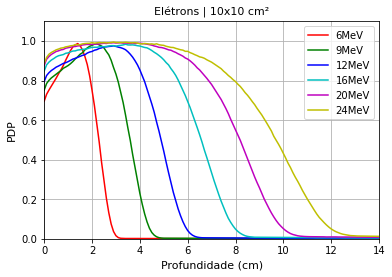

In [21]:
legenda = 0
for nome_output in list_output:
    df = output()
    df = normaliza()
    mediana = bins()
    novodf2 = dataframe()
    if particula == 'f':
        plt.plot(novodf2['z']/(10/3), novodf2['Dose'], color = cores[legenda], label = list_legend[legenda]) 
    if particula == 'e':
        plt.plot(novodf2['z']/10, novodf2['Dose'], color = cores[legenda], label = list_legend[legenda])
    legenda += 1
    
plt.title(titulo, fontsize=11)
plt.xlabel('Profundidade (cm)', fontsize=11)
plt.ylabel('PDP', fontsize=11)
if particula == 'f':
    plt.xlim(0,30)
if particula == 'e':
    plt.xlim(0,14)
plt.ylim(0,1.1)
plt.legend()
plt.grid()
plt.show()